In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

df = pd.read_csv("Constituencies.csv")
df["เขต"] = (~(df["เขตเลือกตั้งที่"].isna())).cumsum()
df = df.ffill()
df["ท้องที่ที่ประกอบเป็นเขตเลือกตั้ง"] = df["ท้องที่ที่ประกอบเป็นเขตเลือกตั้ง"].str[:] + " "
df = df.groupby(["จังหวัด", "เขต"], sort = False)["ท้องที่ที่ประกอบเป็นเขตเลือกตั้ง"].sum().str.strip()
df = df.reset_index()

df["shifted"] = df["จังหวัด"].eq(df["จังหวัด"].shift(1)).astype(int)
df["เขต"] = df.groupby("จังหวัด")["shifted"].cumsum() + 1
df = df[["จังหวัด", "เขต", "ท้องที่ที่ประกอบเป็นเขตเลือกตั้ง"]]
df

c:\Users\kittapat.ra\AppData\Local\Programs\Python\Python39\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\kittapat.ra\AppData\Local\Temp\ipykernel_20100\1411325919.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapel

,จังหวัด,เขต,ท้องที่ที่ประกอบเป็นเขตเลือกตั้ง
0,ตราด,1,ทั้งจังหวัด
1,ระนอง,1,ทั้งจังหวัด
2,สมุทรสงคราม,1,ทั้งจังหวัด
3,สิงห์บุรี,1,ทั้งจังหวัด
4,ชัยนาท,1,๑. อําเภอเมืองชัยนาท ไ๒. อําเภอสรรพยา ณ๓. อําเ...
...,...,...,...
395,กรุงเทพมหานคร,29,๑. เขตบางแค (เฉพาะแขวงบางแคเหนือ และแขวงบางไผ่...
396,กรุงเทพมหานคร,30,๑๑. เขตบางแค (ยกเว้นแขวงบางแคเหนือ และแขวงบางไ...
397,กรุงเทพมหานคร,31,๑. เขตทวีวัฒนา ๒. เขตตลิ่งชัน (ยกเว้นแขวงบางเช...
398,กรุงเทพมหานคร,32,๑. เขตบางกอกบ้อย (เฉพาะแขวงศิริราช) ๒๒. เขตบาง...


In [2]:
import difflib
actual = pd.read_csv("constuency_position.csv")
# actual[["จังหวัด", "จำนวนเขต"]]
df["จังหวัด"] = df["จังหวัด"].map(lambda x: difflib.get_close_matches(x, actual["จังหวัด"])[0])
actual_merged = actual.merge(df.groupby("จังหวัด").count()["เขต"].reset_index())
actual_merged["diff"] = actual_merged["จำนวนเขต"] - actual_merged["เขต"]
actual_merged[actual_merged["diff"] != 0]

,order,จังหวัด,Province,จำนวนเขต,Unnamed: 4,เขต,diff


In [6]:
gdf_ref = gpd.read_file("new_datasets/PAT map (RTSD)/rtsd_pat.geojson")
municipal_ref = gpd.read_file("new_datasets/Municipalities/municipalities.geojson")

In [7]:
municipal_ref

,NAME_TH,NAME_EN,PA_CODE,A_NAME_EN,A_NAME_TH,P_CODE,P_NAME_EN,P_NAME_TH,VALID_ON,DLA_CODE,geometry
0,เทศบาลตำบลขัวมุง,KHUA MUNG MUNICIPALITY,5019,Saraphi,สารภี,50,Chiang Mai,เชียงใหม่,2022-01-22,5501906,"POLYGON ((98.99462 18.68672, 98.99431 18.68677..."
1,เทศบาลตำบลท่ากว้าง,THA KWANG MUNICIPALITY,5019,Saraphi,สารภี,50,Chiang Mai,เชียงใหม่,2022-01-22,5501908,"POLYGON ((99.00107 18.68160, 99.00066 18.68187..."
2,เทศบาลตำบลชมภู,CHOMPHU MUNICIPALITY,5019,Saraphi,สารภี,50,Chiang Mai,เชียงใหม่,2022-01-22,5501904,"POLYGON ((99.06627 18.72541, 99.06614 18.72521..."
3,เทศบาลตำบลไชยสถาน,CHAIYA SATHAN MUNICIPALITY,5019,Saraphi,สารภี,50,Chiang Mai,เชียงใหม่,2022-01-22,5501905,"POLYGON ((99.05029 18.76131, 99.05029 18.76141..."
4,เทศบาลตำบลดอนแก้ว,DON KAEO MUNICIPALITY,5019,Saraphi,สารภี,50,Chiang Mai,เชียงใหม่,2022-01-22,5501907,"POLYGON ((98.98603 18.71367, 98.98584 18.71373..."
...,...,...,...,...,...,...,...,...,...,...,...
2459,เทศบาลนครเกาะสมุย,KO SAMUI CITY MUNICIPALITY,8404,Ko Samui,เกาะสมุย,84,Surat Thani,สุราษฎร์ธานี,2022-01-22,3840401,"POLYGON ((100.06912 9.59352, 100.06900 9.59358..."
2460,เทศบาลเมืองแม่ฮ่องสอน,MAE HONG SON TOWN MUNICIPALITY,5801,Mueang Mae Hong Son,เมืองแม่ฮ่องสอน,58,Mae Hong Son,แม่ฮ่องสอน,2022-01-22,4580102,"POLYGON ((97.96358 19.31210, 97.96358 19.31210..."
2461,เทศบาลเมืองเบตง,BETONG TOWN MUNICIPALITY,9502,Betong,เบตง,95,Yala,ยะลา,2022-01-22,4950201,"POLYGON ((101.01242 5.83755, 101.01184 5.83800..."
2462,เทศบาลตำบลธารน้ำทิพย์,THAN NAM THIP MUNICIPALITY,9502,Betong,เบตง,95,Yala,ยะลา,2022-01-22,5950203,"POLYGON ((101.08395 5.76980, 101.08289 5.77060..."


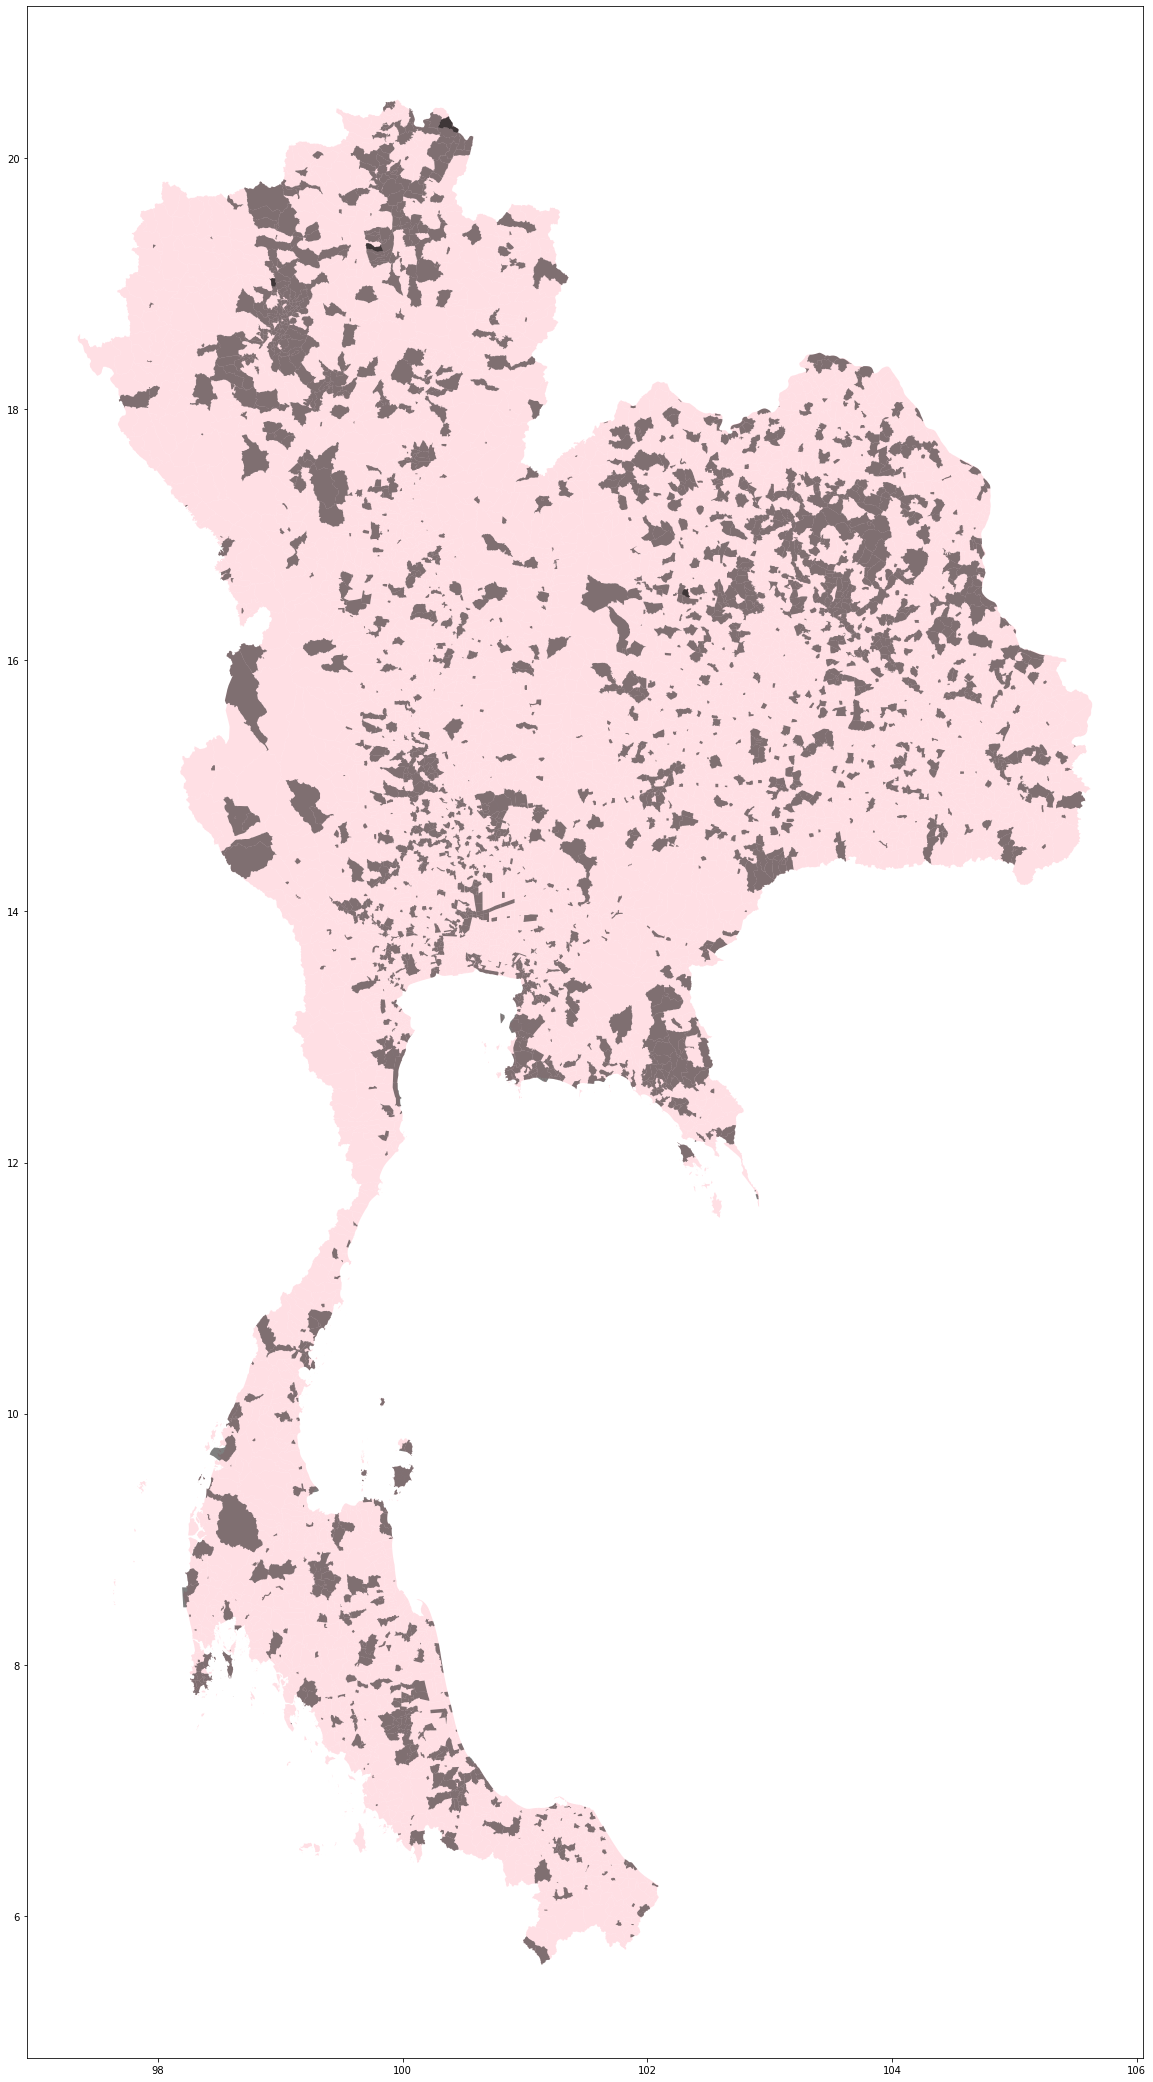

In [4]:
f, ax = plt.subplots(figsize = (20, 40))
gdf_ref.plot(ax = ax, color = "pink", alpha = 0.5)
municipal_ref.plot(ax = ax, color = "#000000", alpha = 0.5)
plt.show()

In [8]:
def remove_none(x):
    x_prime = []
    for y in x:
        if y != "":
            x_prime.append(y)
    return x_prime

dg = df.copy()
dg["ท้องที่ที่ประกอบเป็นเขตเลือกตั้ง"] = dg["ท้องที่ที่ประกอบเป็นเขตเลือกตั้ง"].str.split("""(?= เขต[^\s])|(?=อำเภอ|อาเภอ)|^\S{,2}[\. ]| [^\s'”]{,2}[\. ]|[๐๑๒๓๔๕๖๗๘๙0123456789]\.+ |ดตา\. """).apply(remove_none)
dg = dg.explode("ท้องที่ที่ประกอบเป็นเขตเลือกตั้ง")
dg["อำเภอ"] = dg["ท้องที่ที่ประกอบเป็นเขตเลือกตั้ง"].apply(lambda x: x.split()[0])
dg["ตำบล"] = dg["ท้องที่ที่ประกอบเป็นเขตเลือกตั้ง"].apply(lambda x: " ".join(x.split()[1:])[1:-1])

dg

,จังหวัด,เขต,ท้องที่ที่ประกอบเป็นเขตเลือกตั้ง,อำเภอ,ตำบล
0,ตราด,1,ทั้งจังหวัด,ทั้งจังหวัด,
1,ระนอง,1,ทั้งจังหวัด,ทั้งจังหวัด,
2,สมุทรสงคราม,1,ทั้งจังหวัด,ทั้งจังหวัด,
3,สิงห์บุรี,1,ทั้งจังหวัด,ทั้งจังหวัด,
4,ชัยนาท,1,อําเภอเมืองชัยนาท,อําเภอเมืองชัยนาท,
...,...,...,...,...,...
398,กรุงเทพมหานคร,32,เขตภาษีเจริญ (ยกเว้นแขวงบางหว้า แขวงบางด้วน ' ...,เขตภาษีเจริญ,ยกเว้นแขวงบางหว้า แขวงบางด้วน ' และแขวงคลองขวาง
398,กรุงเทพมหานคร,32,เขตตลิ่งชัน (เฉพาะแขวงบางเชือกหนัง),เขตตลิ่งชัน,เฉพาะแขวงบางเชือกหนัง
398,กรุงเทพมหานคร,32,เขตธนบุรี (เฉพาะแขวงวัดกัลยาณ์ แขวงหิรัญรูจ แล...,เขตธนบุรี,เฉพาะแขวงวัดกัลยาณ์ แขวงหิรัญรูจ และแขวงบางยี่...
399,กรุงเทพมหานคร,33,เขตบางพลัด,เขตบางพลัด,


In [9]:
import re
import numpy as np

def tesaban_concat(x):
    y = []
    tesaban = []
    tesaban_bool = False
    parenthesis_bool = False
    for idx in range(len(x)):
        if (x[idx].strip() == "เทศบาล") and (not(parenthesis_bool)):
            tesaban.append(x[idx].strip())
            tesaban_bool = True
        elif tesaban_bool:
            tesaban.append(x[idx].strip())
            if not(parenthesis_bool):
                if x[idx].strip() != "":
                    if x[idx].strip()[-1] == "(":
                        parenthesis_bool = True
                    else:
                        y.append("".join(tesaban))
                        tesaban = []
                        tesaban_bool = False
            else:
                if x[idx].strip() != "":
                    if x[idx].strip()[-1] == ")":
                        parenthesis_bool = False
                        y.append("".join(tesaban))
                        tesaban = []
                        tesaban_bool = False
                    else:
                        continue
        else:
            if x[idx].strip() != "":
                if (x[idx].strip()[-1] != "(") and (tesaban == []):
                    y.append(x[idx].strip())
                elif not(parenthesis_bool):
                    tesaban.append(x[idx].strip())
                    parenthesis_bool = True
                else:
                    if x[idx].strip() != "":
                        tesaban.append(x[idx].strip())
                        if x[idx].strip()[-1] == ")":
                            y.append("".join(tesaban))
                            tesaban = []
                            parenthesis_bool = False
    return y

def split_tesaban(x):
    y = []
    if type(x) == str:
        x_new = re.sub("\(|\)| ", "", x)
        x_arr = re.split("(?=เทศบาล)", x_new)
        for element in x_arr:
            if re.findall("เทศบาล", element) == []:
                
                if element.strip() != "":
                    y += remove_none(re.split("ตำบล|ตาบล|ตําบล", element))
            else:
                y.append(element.strip())
        return y
    else:
        return x

dgg = dg[["จังหวัด", "เขต", "อำเภอ", "ตำบล"]]
dgg["ตำบล"] = dgg["ตำบล"].str.split("(?=แขวง)|(?=ตำบล|ตาบล|ตําบล)|(?=เทศบาล)|และ").apply(remove_none)
dgg["flag"] = dgg["ตำบล"].str[0].apply(lambda x: difflib.get_close_matches(x, ["เฉพาะ", "ยกเว้น"]) if type(x) not in [float, int] else np.nan).str[0]
dgg["ตำบล"] = dgg.apply(lambda x: x["ตำบล"][1:] if type(x.flag) == str else x["ตำบล"], axis = 1).apply(tesaban_concat)
dgg["อำเภอ"] = dgg["อำเภอ"].apply(lambda x: np.nan if x == "ทั้งจังหวัด" else re.sub("อำเภอ|อําเภอ|อาเภอ|เขต", "", x))
dgg = dgg.explode("ตำบล")
dgg["ตำบล"] = dgg["ตำบล"].apply(lambda x: x if ((type(x) != str) or (re.findall("เทศบาล", x) != [])) else re.sub("แขวง|ตาบล|ตำบล|ตําบล", "", x))
dgg["optional"] = dgg["ตำบล"].str.split("\(").str[1].apply(split_tesaban)
dgg["ตำบล"] = dgg["ตำบล"].str.split("\(").str[0].apply(lambda x: x if ((type(x) != str) or (re.findall("เทศบาล", x) != [])) else re.sub("แขวง|ตาบล|ตำบล|ตําบล", "",x))
dgg = dgg.explode("optional")

dgg

C:\Users\kittapat.ra\AppData\Local\Temp\ipykernel_20100\2216060375.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dgg["ตำบล"] = dgg["ตำบล"].str.split("(?=แขวง)|(?=ตำบล|ตาบล|ตําบล)|(?=เทศบาล)|และ").apply(remove_none)


,จังหวัด,เขต,อำเภอ,ตำบล,flag,optional
0,ตราด,1,NaN,NaN,NaN,NaN
1,ระนอง,1,NaN,NaN,NaN,NaN
2,สมุทรสงคราม,1,NaN,NaN,NaN,NaN
3,สิงห์บุรี,1,NaN,NaN,NaN,NaN
4,ชัยนาท,1,เมืองชัยนาท,NaN,NaN,NaN
...,...,...,...,...,...,...
398,กรุงเทพมหานคร,32,ธนบุรี,วัดกัลยาณ์,เฉพาะ,NaN
398,กรุงเทพมหานคร,32,ธนบุรี,หิรัญรูจ,เฉพาะ,NaN
398,กรุงเทพมหานคร,32,ธนบุรี,บางยี่เรือ,เฉพาะ,NaN
399,กรุงเทพมหานคร,33,บางพลัด,NaN,NaN,NaN


In [7]:
municipal_ref[municipal_ref["P_NAME_TH"].str.contains("นครศรีธรรมราช")]

,NAME_TH,NAME_EN,PA_CODE,A_NAME_EN,A_NAME_TH,P_CODE,P_NAME_EN,P_NAME_TH,VALID_ON,VALID_TO,DLA_CODE,geometry
100,เทศบาลตำบลเขาชุมทอง,KHAO CHUM THONG MUNICIPALITY,8013,Ron Phibun,ร่อนพิบูลย์,80,Nakhon Si Thammarat,นครศรีธรรมราช,2022-01-22,None,5801301,"POLYGON ((99.90553 8.15940, 99.90550 8.15928, ..."
101,เทศบาลตำบลร่อนพิบูลย์,RON PHIBUN MUNICIPALITY,8013,Ron Phibun,ร่อนพิบูลย์,80,Nakhon Si Thammarat,นครศรีธรรมราช,2022-01-22,None,5801302,"POLYGON ((99.82870 8.14438, 99.82738 8.13992, ..."
102,เทศบาลตำบลหินตก,HIN TOK MUNICIPALITY,8013,Ron Phibun,ร่อนพิบูลย์,80,Nakhon Si Thammarat,นครศรีธรรมราช,2022-01-22,None,5801303,"POLYGON ((99.89372 8.26420, 99.89377 8.26420, ..."
103,เทศบาลตำบลนาสาร,NA SAN MUNICIPALITY,8020,Phra Phrom,พระพรหม,80,Nakhon Si Thammarat,นครศรีธรรมราช,2022-01-22,None,5802003,"POLYGON ((99.93562 8.39531, 99.93566 8.39531, ..."
104,เทศบาลตำบลขุนทะเล,KHUN THALE MUNICIPALITY,8003,Lan Saka,ลานสกา,80,Nakhon Si Thammarat,นครศรีธรรมราช,2022-01-22,None,5800302,"POLYGON ((99.81282 8.37195, 99.81297 8.37194, ..."
105,เทศบาลตำบลลานสกา,LAN SAKA MUNICIPALITY,8003,Lan Saka,ลานสกา,80,Nakhon Si Thammarat,นครศรีธรรมราช,2022-01-22,None,5800301,"POLYGON ((99.80584 8.36382, 99.80587 8.36377, ..."
248,เทศบาลตำบลจันดี,CHAN DI MUNICIPALITY,8004,Chawang,ฉวาง,80,Nakhon Si Thammarat,นครศรีธรรมราช,2022-01-22,None,5800401,"POLYGON ((99.58492 8.42095, 99.58486 8.42057, ..."
249,เทศบาลตำบลฉวาง,CHAWANG MUNICIPALITY,8004,Chawang,ฉวาง,80,Nakhon Si Thammarat,นครศรีธรรมราช,2022-01-22,None,5800402,"POLYGON ((99.51331 8.41603, 99.51324 8.41577, ..."
250,เทศบาลตำบลปากน้ำฉวาง,CHAWANG MUNICIPALITY,8004,Chawang,ฉวาง,80,Nakhon Si Thammarat,นครศรีธรรมราช,2022-01-22,None,5800409,"POLYGON ((99.51240 8.43124, 99.51240 8.43119, ..."
251,เทศบาลตำบลไม้เรียง,MAI RIANG MUNICIPALITY,8004,Chawang,ฉวาง,80,Nakhon Si Thammarat,นครศรีธรรมราช,2022-01-22,None,5800403,"POLYGON ((99.49268 8.47980, 99.49277 8.47967, ..."


In [10]:
def sub_amphoe(x):
    if type(x["อำเภอ"]) == str: 
        focused = adm_df[adm_df.P_NAME_TH == x["จังหวัด"]]
        result = difflib.get_close_matches(x["อำเภอ"], focused.A_NAME_TH)
        if result != []:
            return result[0]
        else:
            return np.nan
    else:
        return x["อำเภอ"]
    
def sub_tambon(x, optional = False):
    if optional: tb = "optional"
    else: tb = "ตำบล"
    if type(x[tb]) == str:
        if re.findall("เทศบาล", x[tb]) != []:
            if x[tb] == "เทศบาลนครนครศรีธรรมราช":
                result = ["เทศบาลนครนครศรีธรรมราช"]
            else:
                result = difflib.get_close_matches(x[tb], adm_mun.NAME_TH)
        else:
            focused = adm_df[(adm_df.P_NAME_TH == x["จังหวัด"]) & (adm_df.A_NAME_TH == x["อำเภอ"])]
            result = difflib.get_close_matches(x[tb], focused.T_NAME_TH)
        if result != []:
            return result[0]
        else:
            return np.nan

adm_df = gdf_ref[["P_NAME_TH", "A_NAME_TH", "T_NAME_TH"]]
adm_mun = municipal_ref[["NAME_TH"]]
last_dgg = dgg.copy()
last_dgg["อำเภอ"] = last_dgg.apply(sub_amphoe, axis = 1)
last_dgg["ตำบล"] = last_dgg.apply(sub_tambon, axis = 1)
last_dgg["optional"] = last_dgg.apply(sub_tambon, optional = True, axis = 1)

last_dgg

,จังหวัด,เขต,อำเภอ,ตำบล,flag,optional
0,ตราด,1,NaN,None,NaN,None
1,ระนอง,1,NaN,None,NaN,None
2,สมุทรสงคราม,1,NaN,None,NaN,None
3,สิงห์บุรี,1,NaN,None,NaN,None
4,ชัยนาท,1,เมืองชัยนาท,None,NaN,None
...,...,...,...,...,...,...
398,กรุงเทพมหานคร,32,ธนบุรี,วัดกัลยาณ์,เฉพาะ,None
398,กรุงเทพมหานคร,32,ธนบุรี,หิรัญรูจี,เฉพาะ,None
398,กรุงเทพมหานคร,32,ธนบุรี,บางยี่เรือ,เฉพาะ,None
399,กรุงเทพมหานคร,33,บางพลัด,None,NaN,None


In [11]:
last_dgg.to_csv("Constituencies_district.csv", index = False)

In [28]:
def PAT_check(x):
    if type(x["อำเภอ"]) != str:
        return [gdf_ref[gdf_ref.P_NAME_TH == x["จังหวัด"]]["P_CODE"].tolist()[0], gdf_ref[gdf_ref.P_NAME_TH == x["จังหวัด"]]["geometry"].unary_union]
    elif (type(x["ตำบล"]) != str):
        result = gdf_ref[(gdf_ref.P_NAME_TH == x["จังหวัด"]) & (gdf_ref.A_NAME_TH == x["อำเภอ"])]
        return [result["PA_CODE"].tolist()[0], result["geometry"].unary_union]
    else:
        if re.findall("เทศบาล",x["ตำบล"]) == []:
            result = gdf_ref[(gdf_ref.P_NAME_TH == x["จังหวัด"]) & (gdf_ref.A_NAME_TH == x["อำเภอ"]) & (gdf_ref.T_NAME_TH == x["ตำบล"])]
            return [result["PAT_CODE"].tolist()[0], result["geometry"].unary_union]
        elif type(x["optional"]) == str:
            if re.findall("เทศบาล",x["optional"]) == []:
                result = gdf_ref[(gdf_ref.P_NAME_TH == x["จังหวัด"]) & (gdf_ref.A_NAME_TH == x["อำเภอ"]) & (gdf_ref.T_NAME_TH == x["optional"])]
                return [result["PAT_CODE"].tolist()[0], result["geometry"].unary_union]
        else:
            result = gdf_ref[(gdf_ref.P_NAME_TH == x["จังหวัด"]) & (gdf_ref.A_NAME_TH == x["อำเภอ"])]
            return [result["PA_CODE"].tolist()[0], result["geometry"].unary_union]
        
def DLA_check(x):
    if type(x["ตำบล"]) == str:
        if re.findall("เทศบาล",x["ตำบล"]) != []:
            result = municipal_ref[municipal_ref["NAME_TH"] == x["ตำบล"]]
            if len(result) > 0:
                return [result["DLA_CODE"].tolist()[0], result["geometry"].unary_union]
    if type(x["optional"]) == str:
        if re.findall("เทศบาล",x["optional"]) != []:
            result = municipal_ref[municipal_ref["NAME_TH"] == x["optional"]]
            return [result["DLA_CODE"].tolist()[0], result["geometry"].unary_union]      

ECT_map = last_dgg.copy()
ECT_map["PAT"] = last_dgg.apply(PAT_check, axis = 1)
ECT_map["DLA"] = last_dgg.apply(DLA_check, axis = 1)

ECT_map

,จังหวัด,เขต,อำเภอ,ตำบล,flag,optional,PAT,DLA
0,ตราด,1,NaN,None,NaN,None,"[23, MULTIPOLYGON (((102.39148749700007 11.771...",None
1,ระนอง,1,NaN,None,NaN,None,"[85, MULTIPOLYGON (((98.53014857200009 9.34440...",None
2,สมุทรสงคราม,1,NaN,None,NaN,None,"[75, POLYGON ((99.98938576800003 13.3268561880...",None
3,สิงห์บุรี,1,NaN,None,NaN,None,"[17, POLYGON ((100.34865218000004 14.779870364...",None
4,ชัยนาท,1,เมืองชัยนาท,None,NaN,None,"[1801, POLYGON ((100.16501011400004 15.1527278...",None
...,...,...,...,...,...,...,...,...
398,กรุงเทพมหานคร,32,ธนบุรี,วัดกัลยาณ์,เฉพาะ,None,"[101501, POLYGON ((100.48787159608105 13.73601...",None
398,กรุงเทพมหานคร,32,ธนบุรี,หิรัญรูจี,เฉพาะ,None,"[101502, POLYGON ((100.494842931108 13.7308583...",None
398,กรุงเทพมหานคร,32,ธนบุรี,บางยี่เรือ,เฉพาะ,None,"[101503, POLYGON ((100.48621874597987 13.72746...",None
399,กรุงเทพมหานคร,33,บางพลัด,None,NaN,None,"[1025, POLYGON ((100.50248272007764 13.7809995...",None


In [29]:
ECT_map["PAT_code"] = ECT_map["PAT"].apply(lambda x: x[0]).astype(str)
ECT_map["PAT_geometry"] = ECT_map["PAT"].apply(lambda x: x[1])
ECT_map["DLA_code"] = ECT_map["DLA"].apply(lambda x: str(int(x[0])) if x else x).astype(str)
ECT_map["DLA_geometry"] = ECT_map["DLA"].apply(lambda x: x[1] if x else x)

ECT_map.drop(columns = ["DLA", "PAT"])#.drop_duplicates()

,จังหวัด,เขต,อำเภอ,ตำบล,flag,optional,PAT_code,PAT_geometry,DLA_code,DLA_geometry
0,ตราด,1,NaN,None,NaN,None,23,MULTIPOLYGON (((102.39148749700007 11.77126791...,None,None
1,ระนอง,1,NaN,None,NaN,None,85,MULTIPOLYGON (((98.53014857200009 9.3444056990...,None,None
2,สมุทรสงคราม,1,NaN,None,NaN,None,75,POLYGON ((99.98938576800003 13.326856188000022...,None,None
3,สิงห์บุรี,1,NaN,None,NaN,None,17,POLYGON ((100.34865218000004 14.77987036400003...,None,None
4,ชัยนาท,1,เมืองชัยนาท,None,NaN,None,1801,POLYGON ((100.16501011400004 15.15272789000005...,None,None
...,...,...,...,...,...,...,...,...,...,...
398,กรุงเทพมหานคร,32,ธนบุรี,วัดกัลยาณ์,เฉพาะ,None,101501,POLYGON ((100.48787159608105 13.73601705390707...,None,None
398,กรุงเทพมหานคร,32,ธนบุรี,หิรัญรูจี,เฉพาะ,None,101502,"POLYGON ((100.494842931108 13.730858373444468,...",None,None
398,กรุงเทพมหานคร,32,ธนบุรี,บางยี่เรือ,เฉพาะ,None,101503,POLYGON ((100.48621874597987 13.72746809908421...,None,None
399,กรุงเทพมหานคร,33,บางพลัด,None,NaN,None,1025,POLYGON ((100.50248272007764 13.78099956308650...,None,None


## Check municipalities

In [11]:
a = municipal_ref[
    municipal_ref["DLA_CODE"].\
        astype(str).str.\
            contains(
                "|".join(ECT_map[ECT_map.DLA_code != "None"]["DLA_code"].tolist())
                )
            ]

ECT_map[(~ECT_map.DLA_code.str.contains("|".join(a["DLA_CODE"].tolist()))) & (ECT_map.DLA_code != "None")]

,จังหวัด,เขต,อำเภอ,ตำบล,flag,optional,PAT,DLA,PAT_code,PAT_geometry,DLA_code,DLA_geometry


## Finalization

In [12]:
import shapely
import pygeos as pg
from shapely.geometry import Polygon, mapping

PAT = gdf_ref[["PAT_CODE", "geometry"]].dropna()
DLA = ECT_map[["DLA_code", "DLA_geometry"]].dropna().drop_duplicates().copy()
DLA = gpd.GeoDataFrame(DLA, geometry = "DLA_geometry", crs = "EPSG:4326")
PAT = gpd.GeoDataFrame(PAT, geometry = "geometry", crs = "EPSG:4326")
DLA.geometry = pg.set_precision(DLA.geometry.values.data, 1e-6)
PAT.geometry = pg.set_precision(PAT.geometry.values.data, 1e-6)
Cross_join = []
for _, dla in DLA.iterrows():
    for _, pat in PAT.iterrows():
        Cross_join.append({
            "PAT_code": pat[0],
            "DLA_code": dla[0],
            "geometry": shapely.intersection(pat[1], dla[1]) 
        })

final_region = gpd.GeoDataFrame(Cross_join)
final_region = final_region[final_region.apply(lambda x: not(x.geometry.is_empty), axis = 1)]

C:\Users\kittapat.ra\AppData\Roaming\Python\Python39\site-packages\shapely\set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


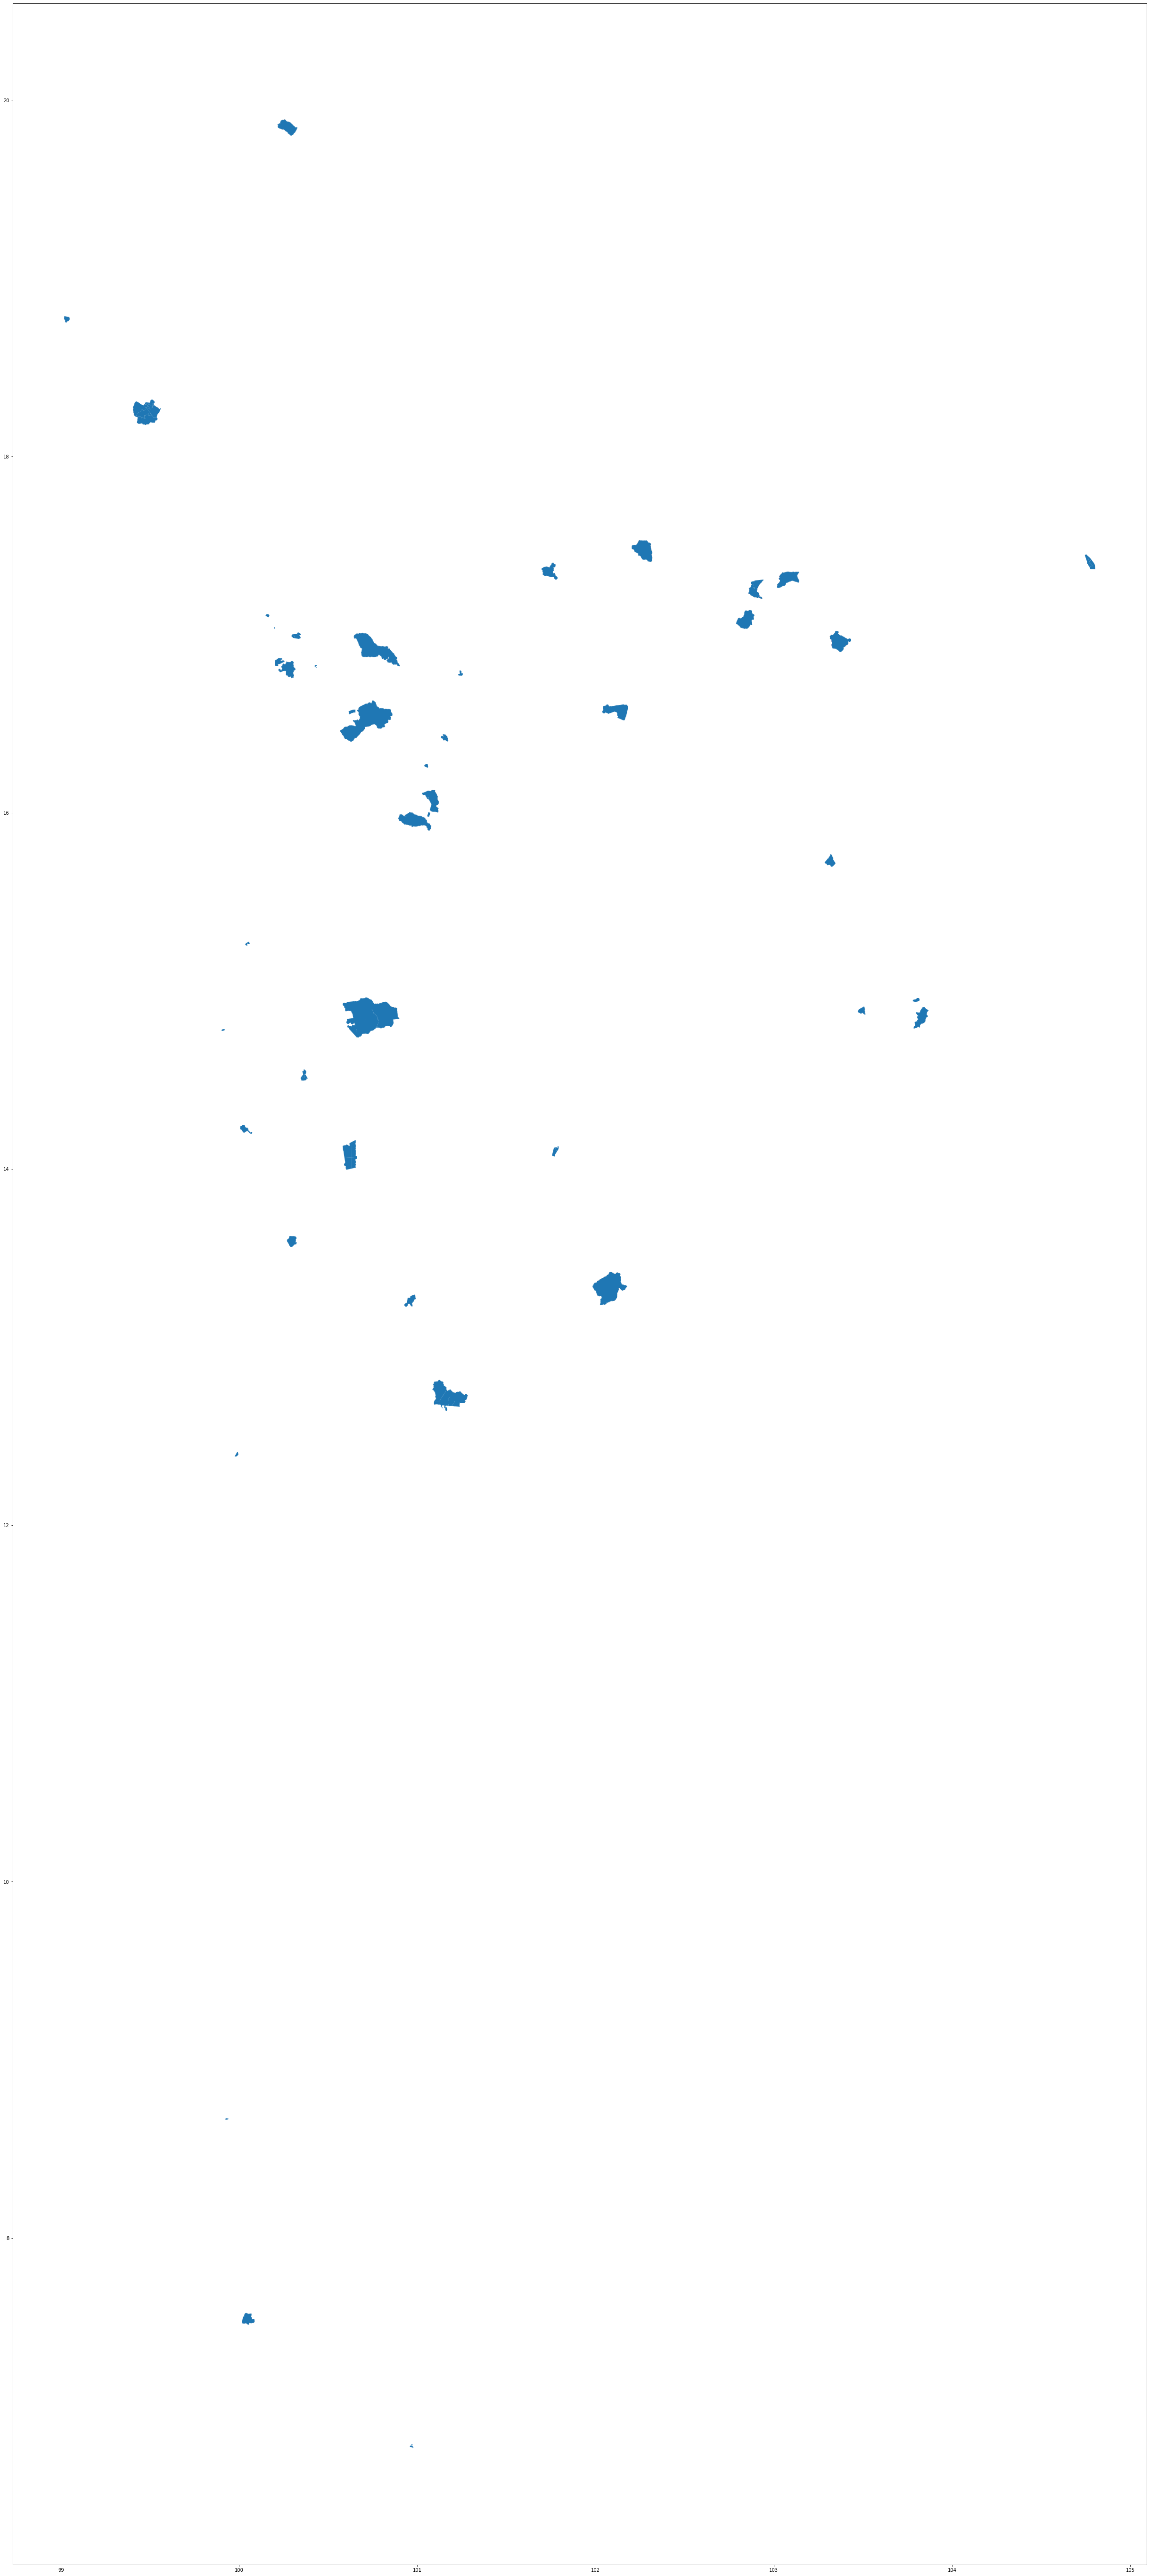

In [13]:
final_region.plot(figsize = (50,100))
plt.show()

In [14]:
from tqdm import tqdm
import pygeos as pg

final_region = final_region[~final_region.geometry.apply(lambda x: x.is_empty)]
PAT_regions = []
for _, pat in tqdm(PAT.iterrows()):
    focused = final_region[final_region["PAT_code"] == pat[0]]["geometry"].tolist()
    union = shapely.unary_union(focused)
    PAT_regions.append({
        "PAT_code": pat[0],
        "DLA_code": None,
        "geometry": shapely.difference(pat[1], union)
    })
last_region = pd.concat([gpd.GeoDataFrame(PAT_regions), final_region], axis = 0)
last_region = last_region[last_region.geometry.apply(lambda x: not(x.is_empty))]
last_region

7436it [00:10, 725.25it/s] 


,PAT_code,DLA_code,geometry
0,110101,None,"POLYGON ((100.60547 13.57636, 100.60538 13.575..."
1,110102,None,"POLYGON ((100.60281 13.65651, 100.60351 13.658..."
2,110103,None,"POLYGON ((100.63039 13.62134, 100.63419 13.619..."
3,110104,None,"POLYGON ((100.62072 13.54018, 100.62039 13.540..."
4,110108,None,"POLYGON ((100.63315 13.55279, 100.63379 13.552..."
...,...,...,...
356441,930110,5930114,"MULTILINESTRING ((100.08552 7.53267, 100.08549..."
356443,930112,5930114,"MULTILINESTRING ((100.03847 7.57730, 100.03553..."
356445,930114,5930114,"MULTILINESTRING ((100.07497 7.52582, 100.07493..."
356451,930205,5930114,"MULTILINESTRING ((100.01981 7.52197, 100.02124..."


In [15]:
last_region[last_region.DLA_code == "5180301"]

,PAT_code,DLA_code,geometry
617,180107,5180301,"MULTILINESTRING ((100.05816 15.26366, 100.0575..."
620,180201,5180301,"MULTILINESTRING ((100.05607 15.26893, 100.0559..."
627,180301,5180301,"POLYGON ((100.04637 15.26807, 100.04655 15.267..."
628,180302,5180301,GEOMETRYCOLLECTION (POLYGON ((100.05204 15.263...
630,180304,5180301,GEOMETRYCOLLECTION (POLYGON ((100.04571 15.271...
4947,610107,5180301,"POLYGON ((100.05586 15.27034, 100.05587 15.270..."


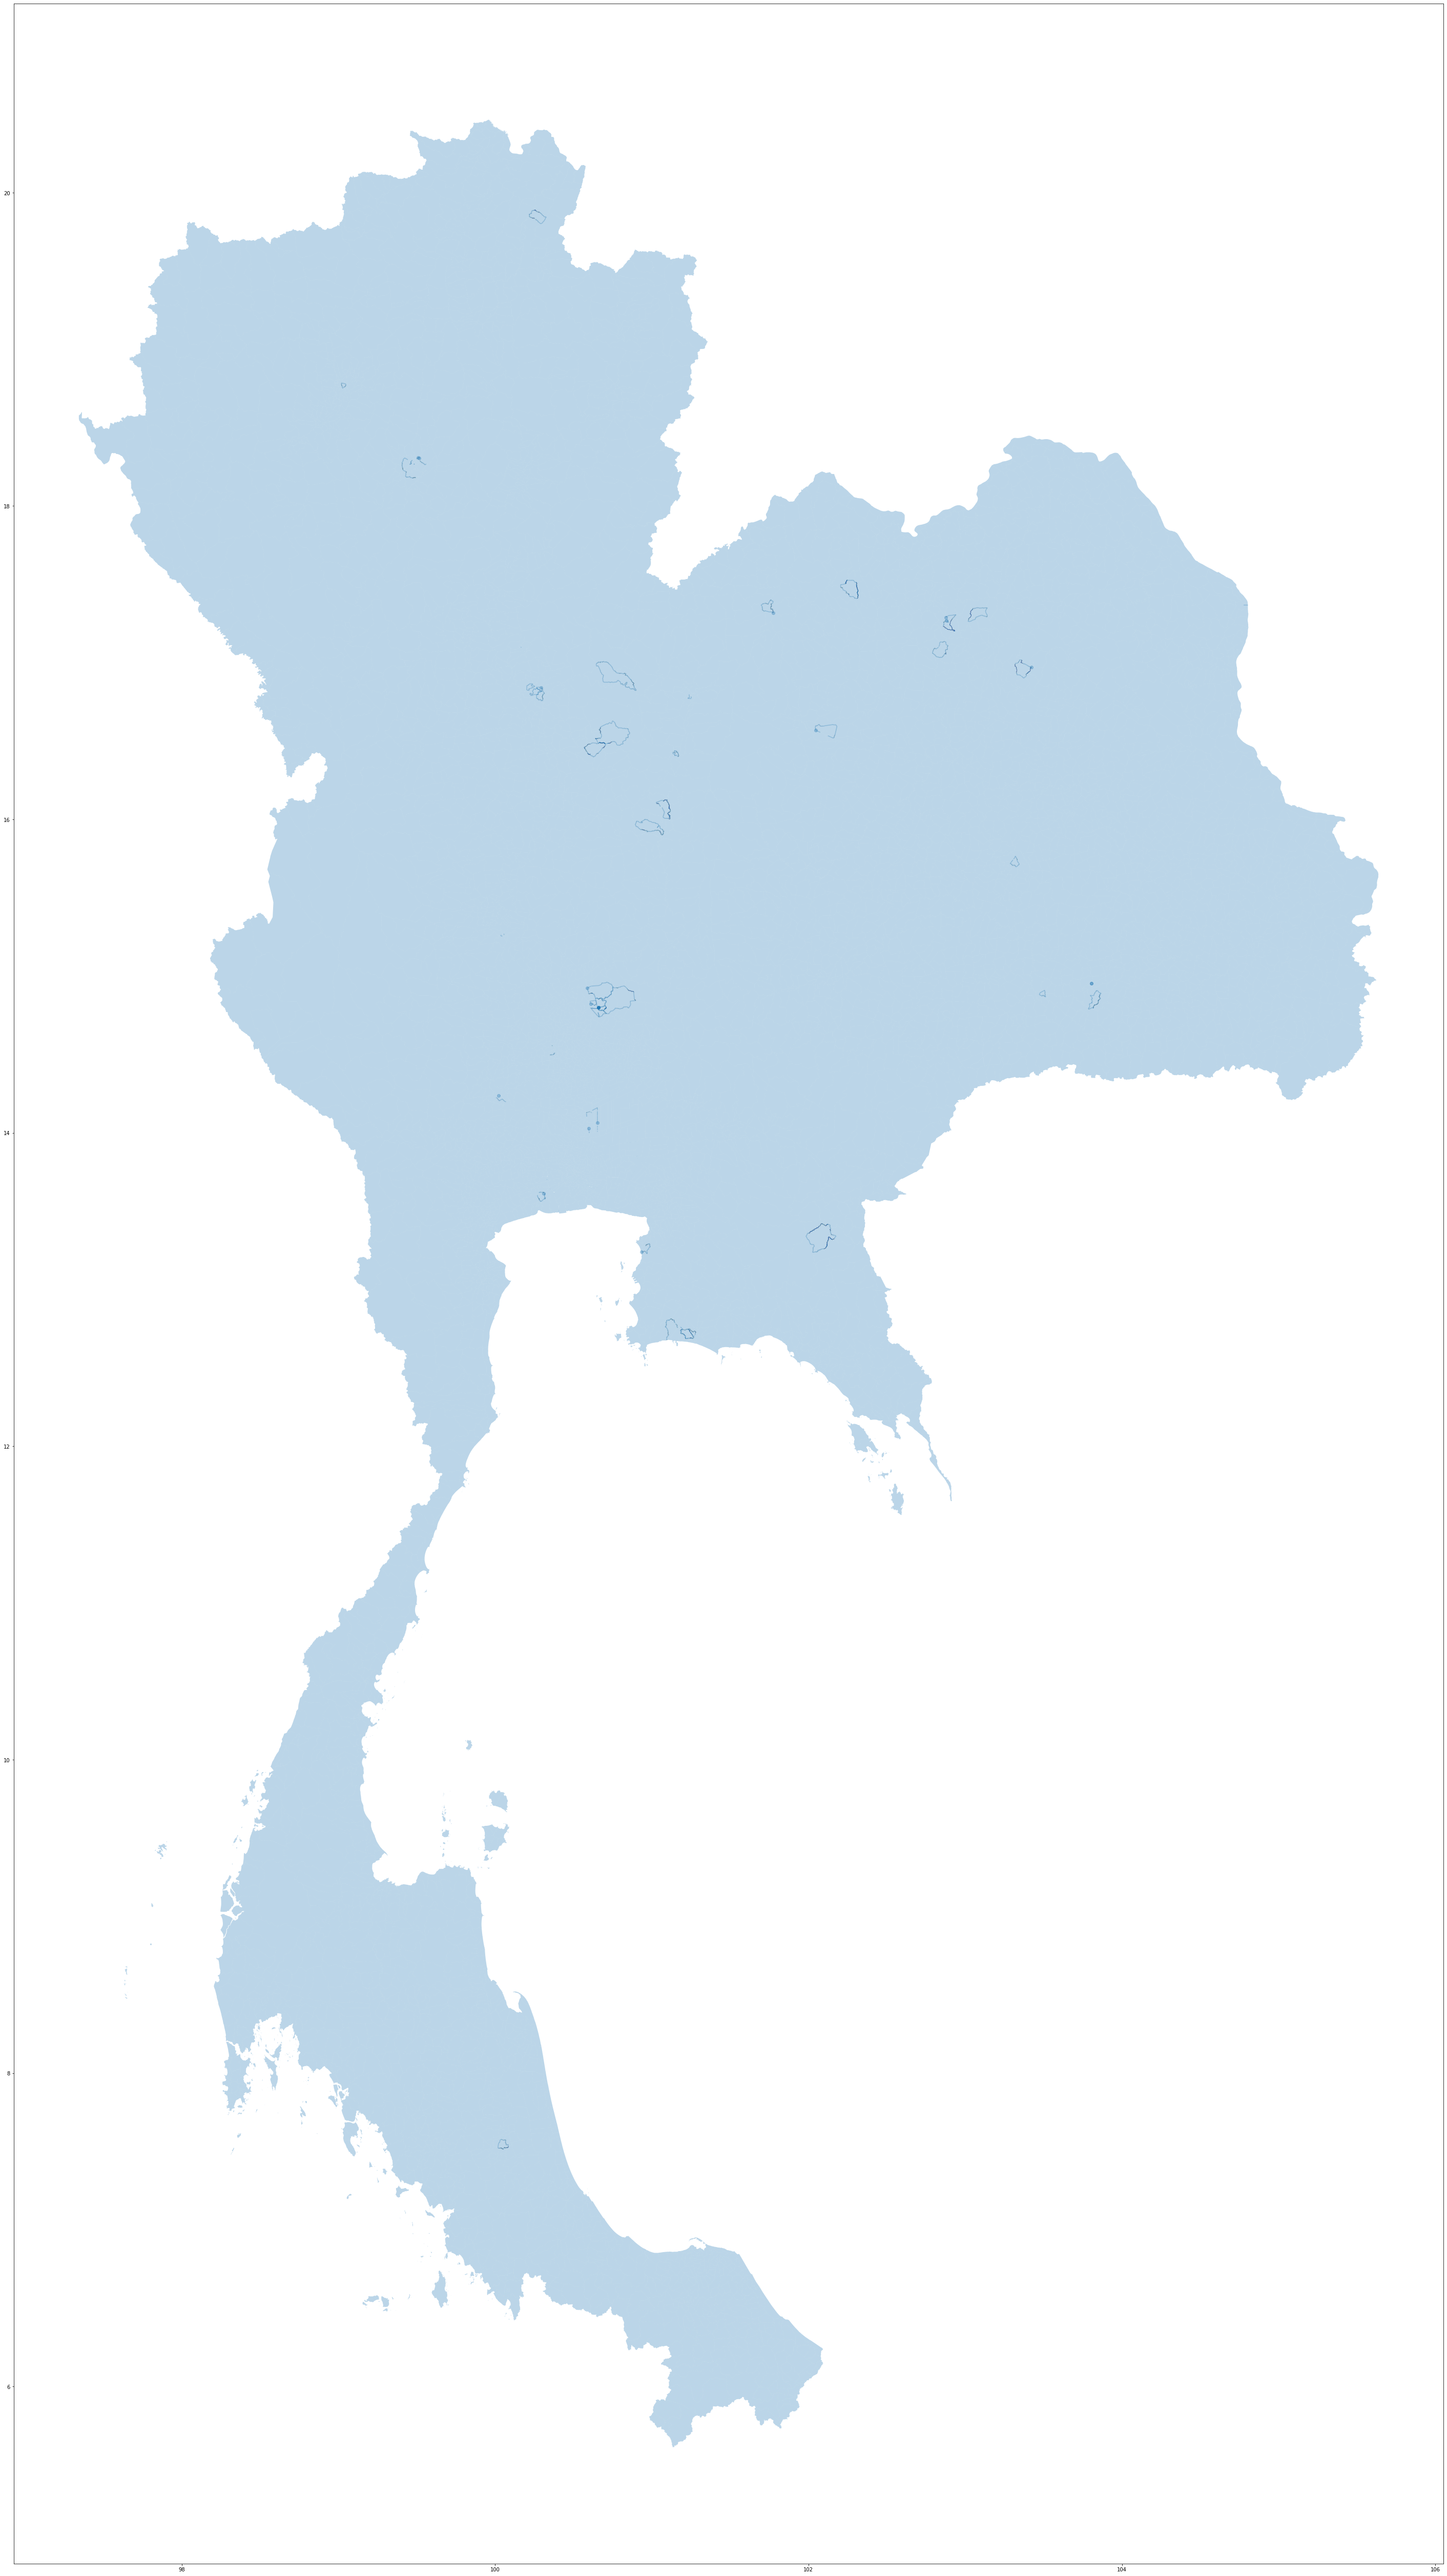

In [16]:
PAT_g = gpd.GeoDataFrame(last_region)
PAT_g.plot(figsize = (50,100), alpha = 0.3)
plt.show()

## ECT map

In [30]:
last_region_df = pd.DataFrame(last_region)
last_region_df

def include_geo(x):
    if (x["DLA_code"] != "None") and (len(x["PAT_code"]) == 6):
        selected = last_region_df[(last_region_df.PAT_code == x["PAT_code"]) & (last_region_df.DLA_code == x["DLA_code"])]
    elif (x["DLA_code"] != "None"):
        if len(x["PAT_code"]) == 4:
            selected = last_region_df[(last_region_df.PAT_code.str[:4] == x["PAT_code"]) & (last_region_df.DLA_code == x["DLA_code"])]
        else:
            selected = last_region_df[(last_region_df.PAT_code.str[:4] == x["PAT_code"]) & (last_region_df.DLA_code == x["DLA_code"])]
    else:
        if len(x["PAT_code"]) == 6:
            selected = last_region_df[(last_region_df.PAT_code == x["PAT_code"])]
        elif len(x["PAT_code"]) == 4:
            selected = last_region_df[(last_region_df.PAT_code.str[:4] == x["PAT_code"])]
        elif len(x["PAT_code"]) == 2:
            selected = last_region_df[(last_region_df.PAT_code.str[:2] == x["PAT_code"])]
    return [selected.PAT_code.tolist(), selected.DLA_code.tolist(), selected.geometry.tolist()]
    
def amphoe(x):
    all_shapes = x["amphoe"]
    pat = sum([i[0] for i in x["geometry"]], [])
    dla = sum([i[1] for i in x["geometry"]], [])
    exclude_shapes = sum([i[2] for i in x["geometry"]], [])

    a1 = []
    b1 = []
    c1 = []

    for a,b,c in zip(all_shapes[0], all_shapes[1], all_shapes[2]):
        if c in exclude_shapes:
            continue
        else:
            a1.append(a)
            b1.append(b)
            c1.append(c)

    return [a1,b1,c1]

include_ECT = ECT_map[ECT_map.flag != "ยกเว้น"][["จังหวัด", "เขต", "อำเภอ", "PAT_code", "DLA_code", "optional"]].copy()
include_ECT["geometry"] = include_ECT.apply(include_geo, axis = 1)
include_ECT = include_ECT[["จังหวัด", "เขต", "อำเภอ", "geometry"]]
include_ECT["PAT_code"] = include_ECT.geometry.apply(lambda x: x[0])
include_ECT["DLA_code"] = include_ECT.geometry.apply(lambda x: x[1])
include_ECT["geometry"] = include_ECT.geometry.apply(lambda x: x[2])
include_ECT = include_ECT.explode(["PAT_code", "DLA_code", "geometry"])

exclude_ECT = ECT_map[ECT_map.flag == "ยกเว้น"][["จังหวัด", "เขต", "อำเภอ", "ตำบล", "optional", "PAT_code", "DLA_code", "optional"]].copy()
exclude_ECT["geometry"] = exclude_ECT.apply(include_geo, axis = 1)
exclude_ECT = exclude_ECT.groupby(["จังหวัด", "เขต", "อำเภอ"])["geometry"].apply(list).reset_index()
exclude_ECT["amphoe"] = exclude_ECT.geometry.apply(
    lambda x: [(am := last_region_df[last_region_df["PAT_code"].str[:4] == x[0][0][0][:4]]).PAT_code.tolist(), am.DLA_code.tolist(), am.geometry.tolist()]
    )
exclude_ECT["geometry"] = exclude_ECT.apply(amphoe, axis = 1)
exclude_ECT = exclude_ECT[["จังหวัด", "เขต", "อำเภอ", "geometry"]]
exclude_ECT["PAT_code"] = exclude_ECT.geometry.apply(lambda x: x[0])
exclude_ECT["DLA_code"] = exclude_ECT.geometry.apply(lambda x: x[1])
exclude_ECT["geometry"] = exclude_ECT.geometry.apply(lambda x: x[2])
exclude_ECT = exclude_ECT.explode(["PAT_code", "DLA_code", "geometry"])
exclude_ECT

,จังหวัด,เขต,อำเภอ,geometry,PAT_code,DLA_code
0,กระบี่,1,เหนือคลอง,"POLYGON ((98.981553 8.131277, 98.981579 8.1312...",810801,None
0,กระบี่,1,เหนือคลอง,"MULTIPOLYGON (((98.983083 7.777243, 98.983122 ...",810802,None
0,กระบี่,1,เหนือคลอง,"MULTIPOLYGON (((99.043967 7.866183, 99.043623 ...",810803,None
0,กระบี่,1,เหนือคลอง,"POLYGON ((99.017909 8.033172, 99.01789 8.03277...",810804,None
0,กระบี่,1,เหนือคลอง,"POLYGON ((98.963588 8.015063, 98.963576 8.0148...",810806,None
...,...,...,...,...,...,...
130,แพร่,1,เมืองแพร่,"POLYGON ((100.343822 18.167668, 100.343972 18....",540112,None
130,แพร่,1,เมืองแพร่,"POLYGON ((100.152008 18.173382, 100.152012 18....",540115,None
130,แพร่,1,เมืองแพร่,"POLYGON ((100.202544 18.087644, 100.202734 18....",540118,None
130,แพร่,1,เมืองแพร่,"POLYGON ((100.193548 18.180411, 100.193706 18....",540119,None


In [31]:
final_ECT_gpd = gpd.GeoDataFrame(pd.concat([exclude_ECT, include_ECT])).drop_duplicates()
color_map = final_ECT_gpd[["จังหวัด", "เขต"]].drop_duplicates()
color_map["color"] = ["#" + "".join(np.random.choice(list("0123456789ABCDEF"), size = 6)) for _ in range(len(color_map))]
color_map

,จังหวัด,เขต,color
0,กระบี่,1,#B8780B
1,กรุงเทพมหานคร,1,#EF37F8
2,กรุงเทพมหานคร,5,#81B996
3,กรุงเทพมหานคร,8,#1B2096
5,กรุงเทพมหานคร,9,#E25DC5
...,...,...,...
380,กรุงเทพมหานคร,14,#66E6C8
381,กรุงเทพมหานคร,15,#A4B2E2
384,กรุงเทพมหานคร,18,#1F4C28
388,กรุงเทพมหานคร,22,#B37115


In [32]:
a = final_ECT_gpd.drop(columns = "geometry")
b = ECT_map[["จังหวัด", "เขต", "อำเภอ", "ตำบล", "optional", "flag", "PAT_code", "DLA_code"]]

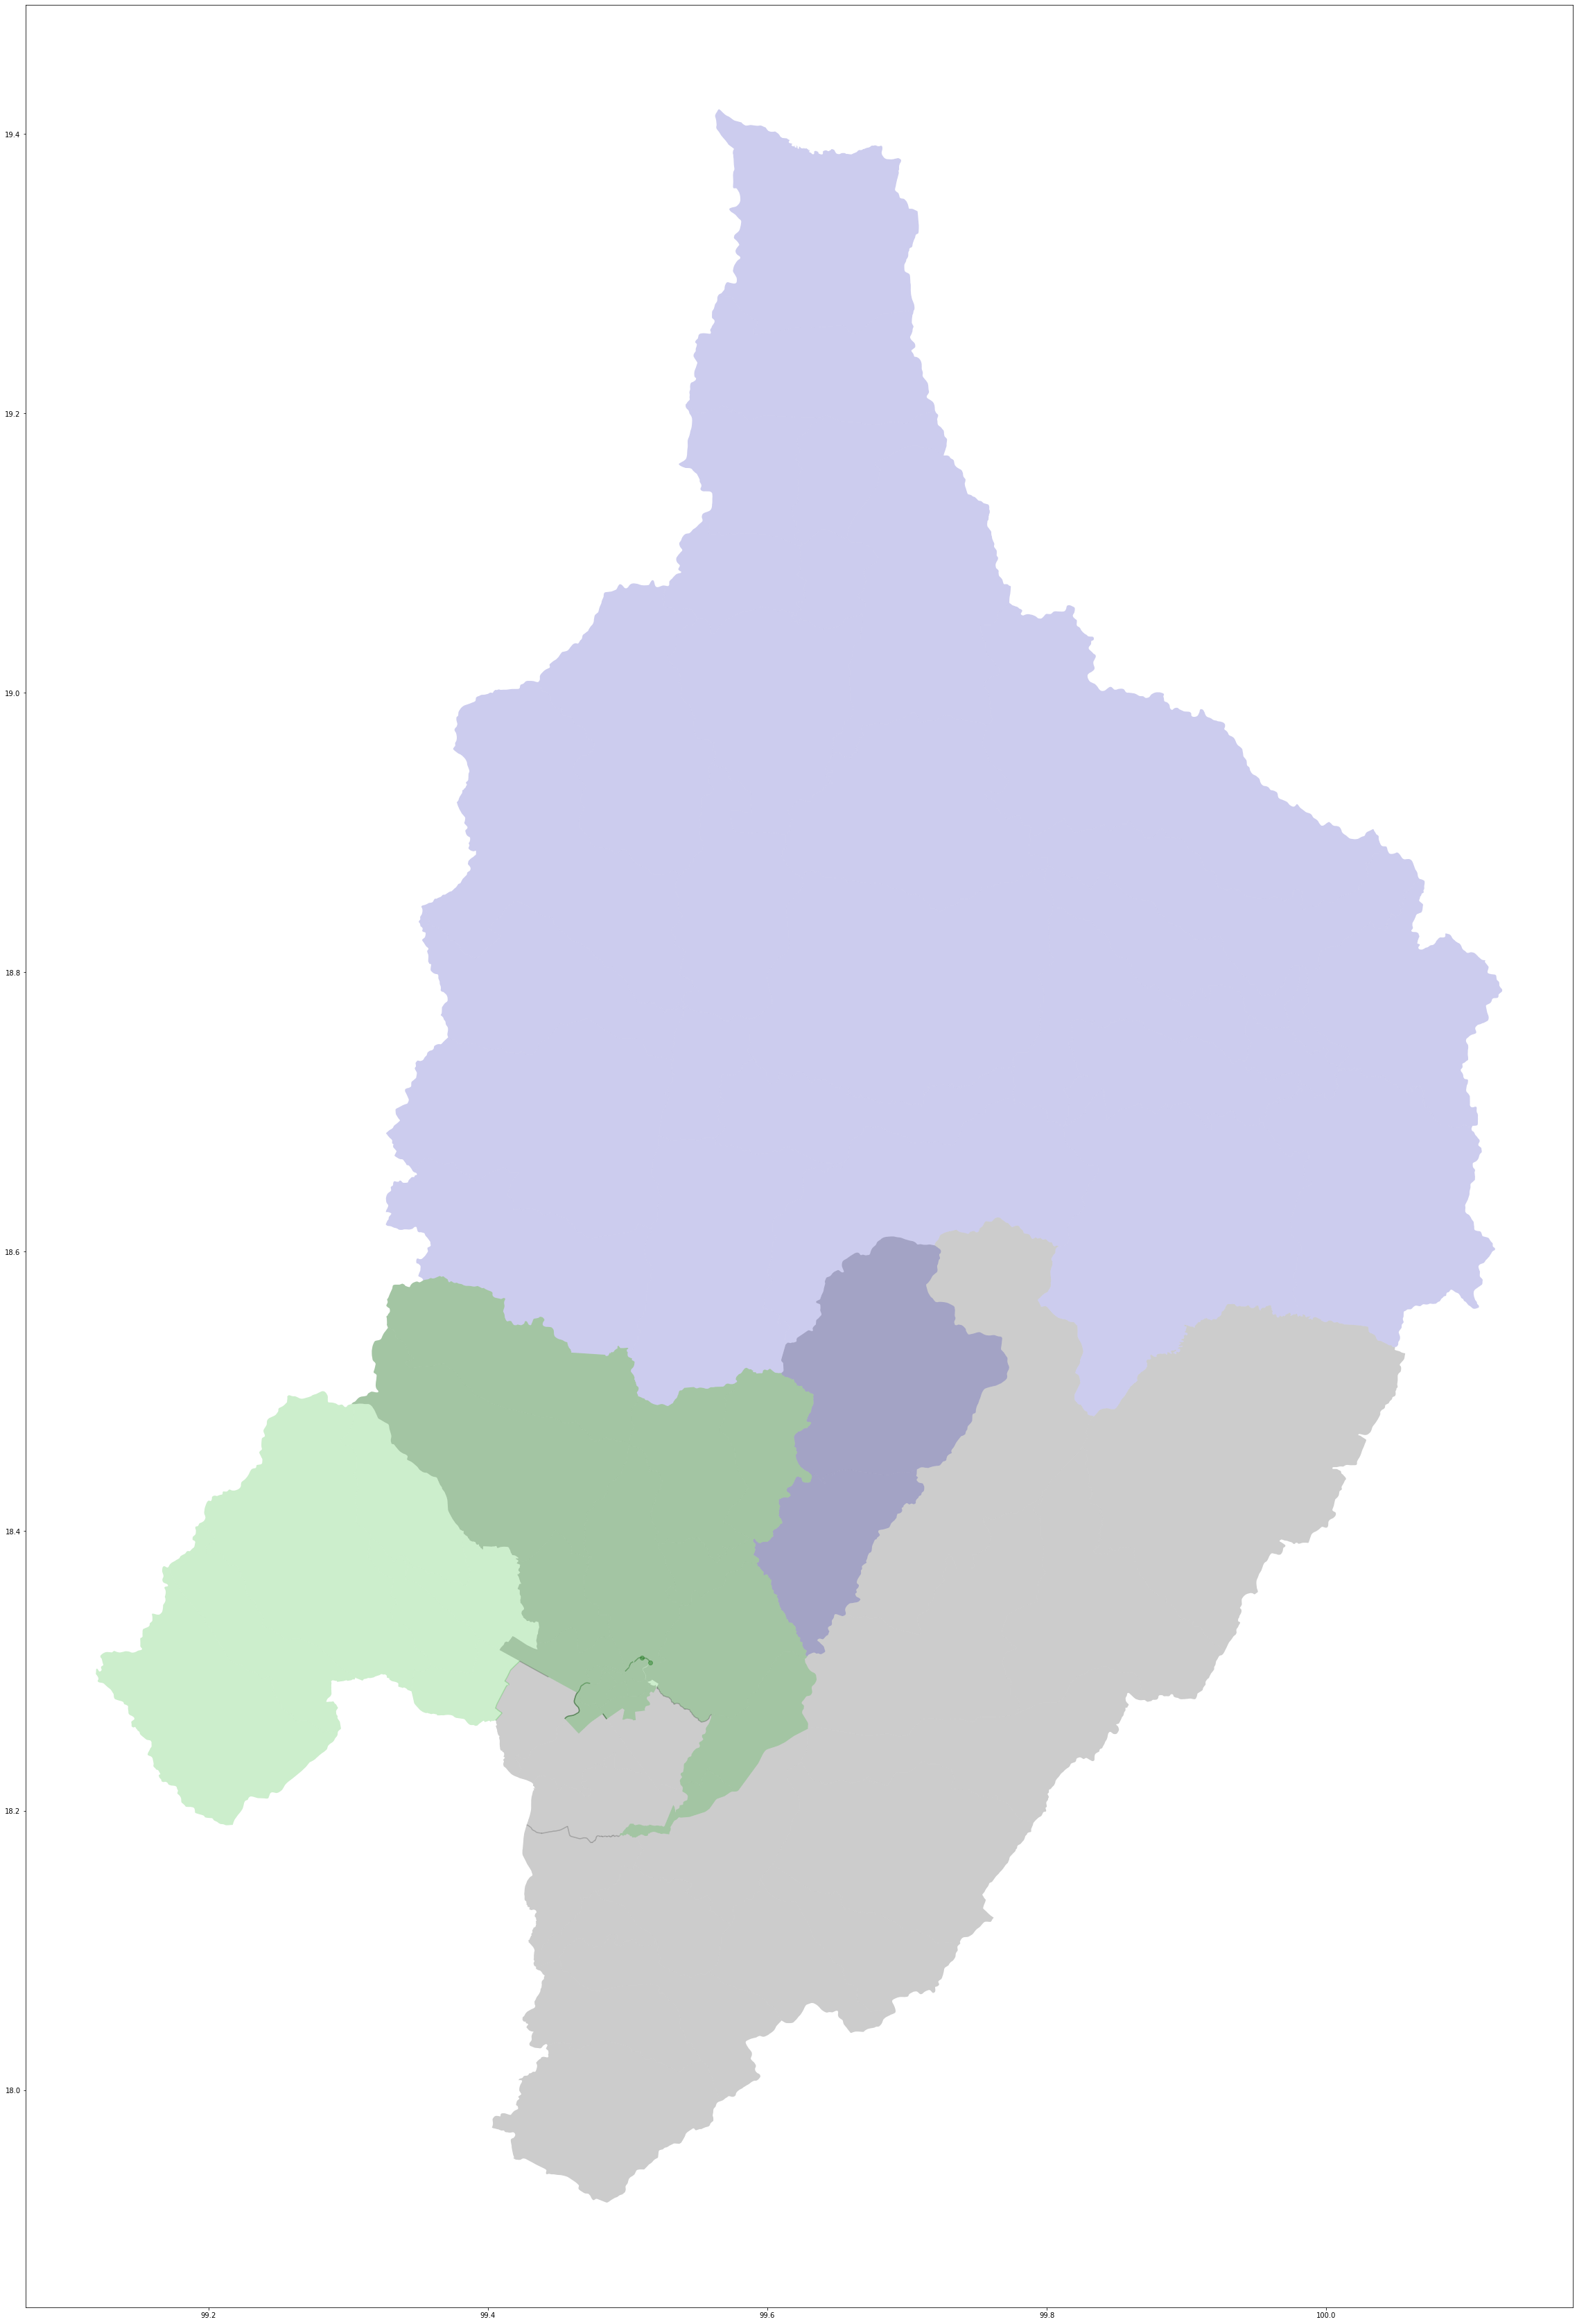

In [89]:
colored = final_ECT_gpd.merge(color_map)
to_plot = colored

_, ax = plt.subplots(figsize = (40,80))
to_plot[((to_plot["จังหวัด"] == "ลำปาง") & (to_plot["เขต"] == 3))].plot(color = "#000000", ax = ax, alpha = 0.2)
to_plot[((to_plot["จังหวัด"] == "ลำปาง") & (to_plot["เขต"] == 2))].plot(color = "#0000AA", ax = ax, alpha = 0.2)
to_plot[((to_plot["จังหวัด"] == "ลำปาง") & (to_plot["เขต"] == 1))].plot(color = "#00AA00", ax = ax, alpha = 0.2)
# to_plot[~((to_plot["จังหวัด"] == "ลำปาง") & (to_plot["เขต"] == 3)) | ~((to_plot["DLA_code"] == "3520102") & (to_plot["PAT_code"] == "520111"))].plot(ax = ax, alpha = 0.5)
# to_plot[(to_plot["DLA_code"] == "3520102")].plot(color = "#000000", ax = ax, alpha = 0.5)
# gdf_ref[gdf_ref["PAT_CODE"].str.contains("650201")].plot(color = "#000000", ax = ax, alpha = 0.5)
# gpd.GeoDataFrame(geometry = [to_plot[(to_plot["เขต"] == 1)].geometry.unary_union], crs = to_plot.crs).boundary.plot(ax = ax, linewidth = 5)
# gpd.GeoDataFrame(geometry = [to_plot[(to_plot["เขต"] == 2)].geometry.unary_union], crs = to_plot.crs).boundary.plot(ax = ax, color = "orange", linewidth = 5)
# gpd.GeoDataFrame(geometry = [to_plot[(to_plot["เขต"] == 3)].geometry.unary_union], crs = to_plot.crs).boundary.plot(ax = ax, color = "green", linewidth = 5)
# gpd.GeoDataFrame(geometry = [to_plot[(to_plot["เขต"] == 4)].geometry.unary_union], crs = to_plot.crs).boundary.plot(ax = ax, color = "pink", linewidth = 5)
# gpd.GeoDataFrame(geometry = [to_plot[(to_plot["เขต"] == 5)].geometry.unary_union], crs = to_plot.crs).boundary.plot(ax = ax, color = "red", linewidth = 5)
# gpd.GeoDataFrame(geometry = [to_plot[(to_plot["เขต"] == 6)].geometry.unary_union], crs = to_plot.crs).boundary.plot(ax = ax, color = "blue", linewidth = 5)
plt.show()

In [69]:
to_plot

,จังหวัด,เขต,อำเภอ,geometry,PAT_code,DLA_code,color
0,กระบี่,1,เหนือคลอง,"POLYGON ((98.98155 8.13128, 98.98158 8.13126, ...",810801,None,#B8780B
1,กระบี่,1,เหนือคลอง,"MULTIPOLYGON (((98.98308 7.77724, 98.98312 7.7...",810802,None,#B8780B
2,กระบี่,1,เหนือคลอง,"MULTIPOLYGON (((99.04397 7.86618, 99.04362 7.8...",810803,None,#B8780B
3,กระบี่,1,เหนือคลอง,"POLYGON ((99.01791 8.03317, 99.01789 8.03277, ...",810804,None,#B8780B
4,กระบี่,1,เหนือคลอง,"POLYGON ((98.96359 8.01506, 98.96358 8.01490, ...",810806,None,#B8780B
...,...,...,...,...,...,...,...
7770,กรุงเทพมหานคร,22,ประเวศ,"POLYGON ((100.63439 13.70086, 100.63563 13.701...",103202,None,#B37115
7771,กรุงเทพมหานคร,23,พระโขนง,"POLYGON ((100.61607 13.70561, 100.61619 13.705...",100905,None,#8B192E
7772,กรุงเทพมหานคร,23,พระโขนง,"POLYGON ((100.61070 13.68430, 100.61063 13.684...",100910,None,#8B192E
7773,กรุงเทพมหานคร,23,บางนา,"POLYGON ((100.60584 13.67350, 100.60634 13.673...",104703,None,#8B192E


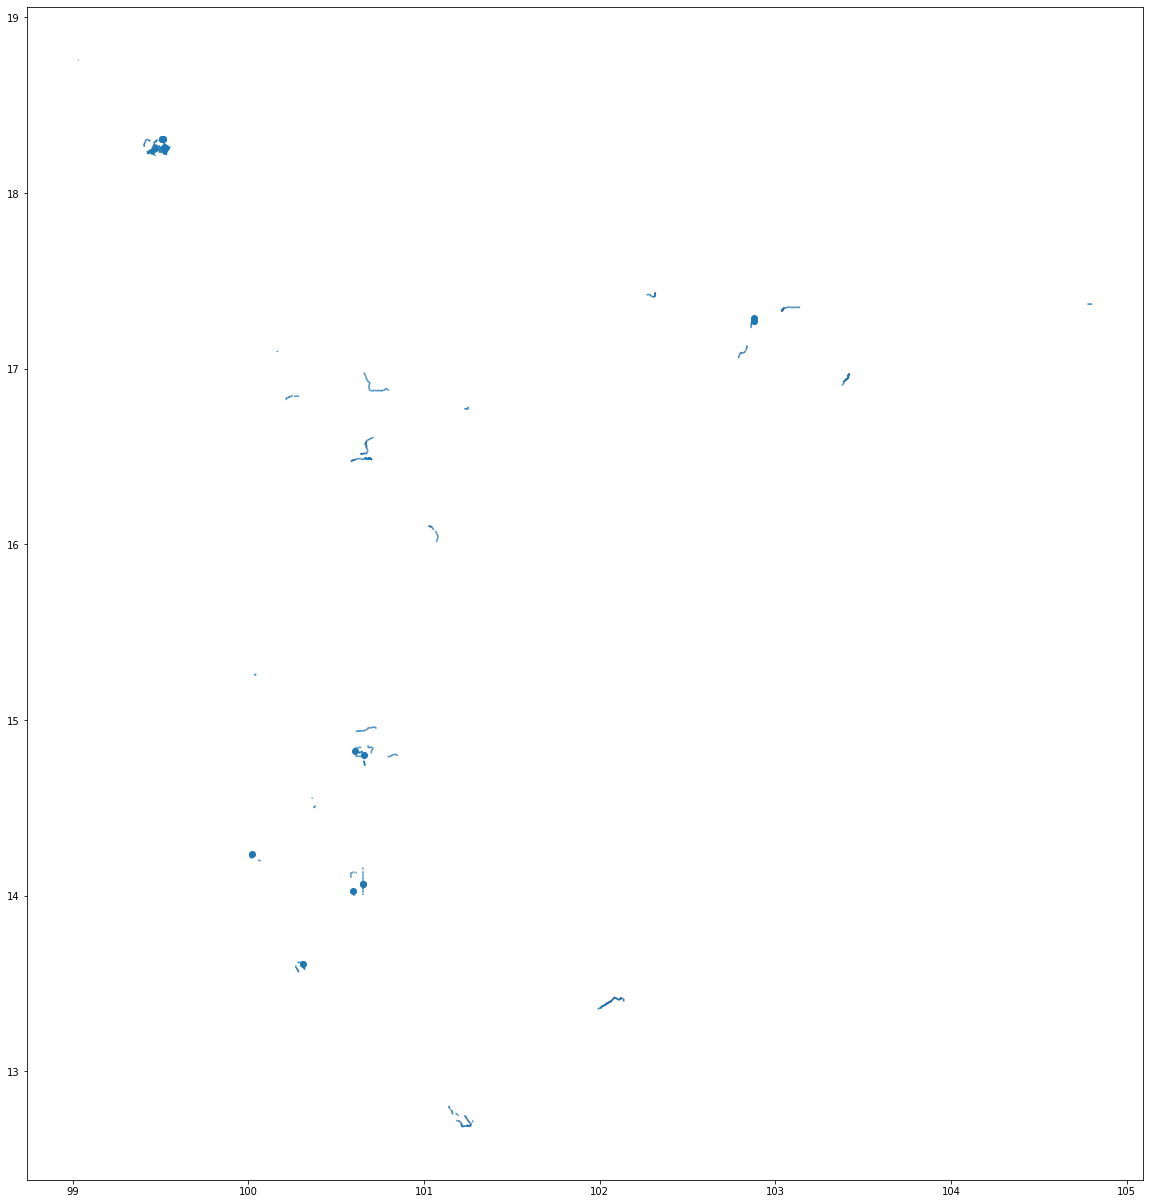

In [184]:
to_plot = to_plot[to_plot["geometry"] != None]
to_plot_2 = to_plot[to_plot.geometry.apply(lambda x: x.geom_type in ["GeometryCollection"])]#, "MultiPolygon", "Polygon"])]
to_plot = to_plot[to_plot.geometry.apply(lambda x: x.geom_type in ["MultiPolygon", "Polygon"])]
to_plot_2.plot(figsize = (20, 40))
plt.show()

In [185]:
from shapely.geometry import mapping, shape, Polygon
to_plot_2["geometry"] = to_plot_2.geometry.apply(
    lambda x: shapely.unary_union([shape(element) if element["type"] in ["Polygon", "MultiPolygon"] else Polygon() for element in mapping(x)["geometries"]])
)

In [186]:
to_plot3 = pd.concat([to_plot,to_plot_2[to_plot_2["geometry"].area > 0.00001]])

In [ ]:
v = pd.DataFrame(to_plot_2.geometry.geom_type)
v[1] = 1
v.groupby(0).sum()

,1
0,
GeometryCollection,68
MultiPolygon,138
Point,13
Polygon,7373


In [196]:
to_plot3.set_crs(epsg=4326).rename(columns = {"จังหวัด": "P_name", "เขต": "CONS_no", "อำเภอ": "A_name"}).drop(columns = ["color", "Type"]).to_file("new_datasets/Constituencies/2566_TH_constituencies.geojson", encode = "UTF-8")

In [ ]:
ECT_map[(ECT_map["จังหวัด"] == "เพชรบูรณ์") & (ECT_map["เขต"] == 2)]

,จังหวัด,เขต,อำเภอ,ตำบล,flag,optional,PAT,DLA,PAT_code,PAT_geometry,DLA_code,DLA_geometry
183,เพชรบูรณ์,2,เมืองเพชรบูรณ์,เทศบาลเมืองเพชรบูรณ์,ยกเว้น,None,"[6701, POLYGON ((101.17640137800004 16.1459907...","[4670102, POLYGON ((101.14939380100003 16.4380...",6701,POLYGON ((101.17640137800004 16.14599074200003...,4670102,POLYGON ((101.14939380100003 16.43801135200004...
183,เพชรบูรณ์,2,เมืองเพชรบูรณ์,ชอนไพร,ยกเว้น,None,"[670110, POLYGON ((101.13977689300003 16.38786...",None,670110,POLYGON ((101.13977689300003 16.38786494800007...,None,None
183,เพชรบูรณ์,2,เมืองเพชรบูรณ์,นาป่า,ยกเว้น,None,"[670111, POLYGON ((101.30365916700003 16.42804...",None,670111,POLYGON ((101.30365916700003 16.42804102200006...,None,None
183,เพชรบูรณ์,2,เมืองเพชรบูรณ์,ตะเบาะ,ยกเว้น,None,"[670102, POLYGON ((101.34745009100004 16.37558...",None,670102,POLYGON ((101.34745009100004 16.37558121000006...,None,None
183,เพชรบูรณ์,2,เมืองเพชรบูรณ์,นายม,ยกเว้น,None,"[670112, POLYGON ((101.08329481600003 16.31143...",None,670112,POLYGON ((101.08329481600003 16.31143000200006...,None,None
183,เพชรบูรณ์,2,เมืองเพชรบูรณ์,บ้านโตก,ยกเว้น,None,"[670103, POLYGON ((101.02513812300003 16.40717...",None,670103,POLYGON ((101.02513812300003 16.40717395200005...,None,None
183,เพชรบูรณ์,2,เมืองเพชรบูรณ์,สะเดียง,ยกเว้น,None,"[670104, POLYGON ((101.16542299700006 16.46441...",None,670104,POLYGON ((101.16542299700006 16.46441891100005...,None,None
183,เพชรบูรณ์,2,เมืองเพชรบูรณ์,น้ำร้อน,ยกเว้น,None,"[670114, POLYGON ((101.21065338100004 16.35679...",None,670114,POLYGON ((101.21065338100004 16.35679972100007...,None,None
183,เพชรบูรณ์,2,เมืองเพชรบูรณ์,ห้วยใหญ่,ยกเว้น,None,"[670116, POLYGON ((101.42876402000007 16.60936...",None,670116,POLYGON ((101.42876402000007 16.60936436500003...,None,None
183,เพชรบูรณ์,2,เมืองเพชรบูรณ์,ห้วยสะแก,ยกเว้น,None,"[670115, POLYGON ((101.09976029900008 16.23415...",None,670115,POLYGON ((101.09976029900008 16.23415394100004...,None,None
